In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline 

In [2]:
df=pd.read_csv("TelecomChurn.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#DEMOGRAPHIC DATA DROPPED 
list1=["customerID",'gender','Partner',"Dependents",'SeniorCitizen','DeviceProtection','PaperlessBilling','PaymentMethod']
df.drop(list1,axis=1,inplace=True)
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,29.85,29.85,No
1,34,Yes,No,DSL,Yes,No,No,No,No,One year,56.95,1889.5,No
2,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,53.85,108.15,Yes
3,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,42.30,1840.75,No
4,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [ ]:
#DEMOGRAPHIC PRESENTATION

<AxesSubplot:xlabel='Churn', ylabel='count'>

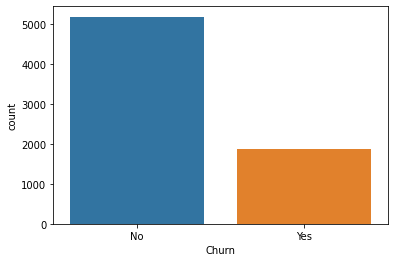

In [9]:
sns.countplot(x="Churn",data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

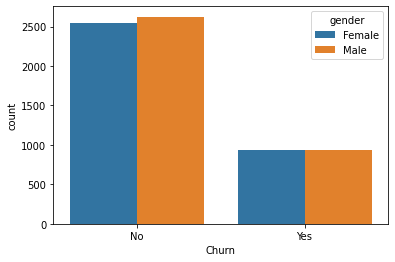

In [10]:
sns.countplot(x="Churn",hue="gender",data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

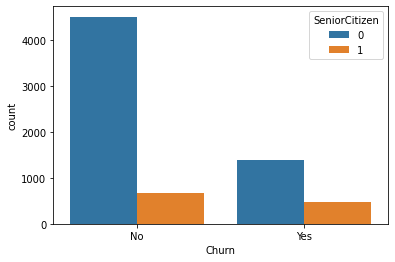

In [11]:
sns.countplot(x="Churn",hue="SeniorCitizen",data=df)

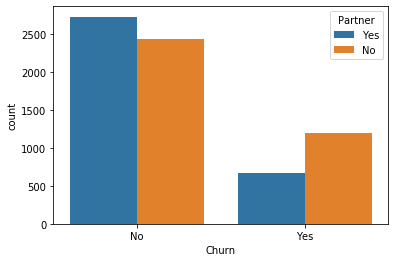

In [54]:
sns.countplot(x="Churn",hue="Partner",data=df)

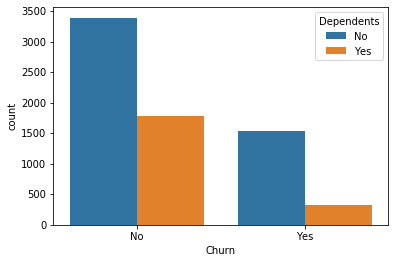

In [55]:
sns.countplot(x="Churn",hue="Dependents",data=df)

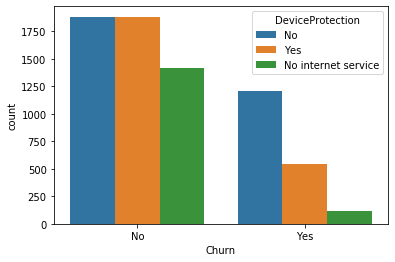

In [56]:
sns.countplot(x="Churn",hue="DeviceProtection",data=df)

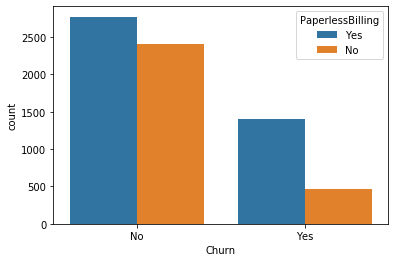

In [57]:
sns.countplot(x="Churn",hue="PaperlessBilling",data=df)

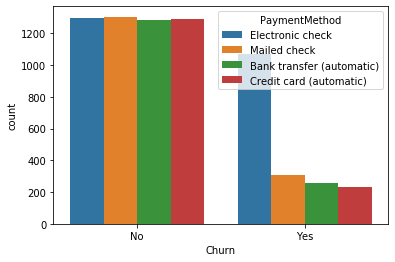

In [58]:
sns.countplot(x="Churn",hue="PaymentMethod",data=df)

In [7]:
#Skewness of Data

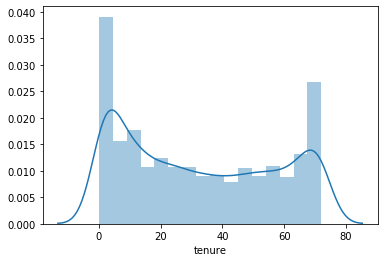

In [11]:
sns.distplot(df["tenure"])

In [26]:
df["tenure"].skew()

0.2395397495619829

In [28]:
df["MonthlyCharges"].skew()

-0.22052443394398033

In [13]:
df['TotalCharges'].replace(" ",np.NaN,inplace=True)
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].replace(np.NaN,np.mean(df["TotalCharges"]),inplace=True)


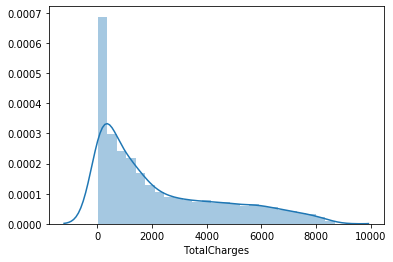

In [60]:
sns.distplot(df["TotalCharges"])

In [5]:
df["TotalCharges"].skew()

0.9623940229874866

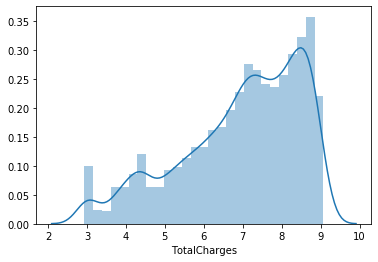

In [6]:
sns.distplot(np.log(df["TotalCharges"]))

In [9]:
np.log(df["TotalCharges"]).skew()

-0.7558896276917938

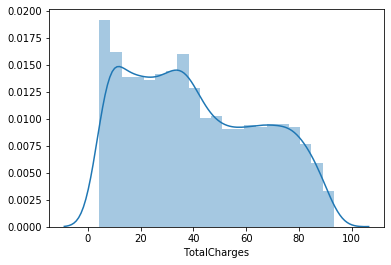

In [7]:
sns.distplot(np.sqrt(df["TotalCharges"]))

In [10]:
np.sqrt(df["TotalCharges"]).skew()

0.30784903124051693

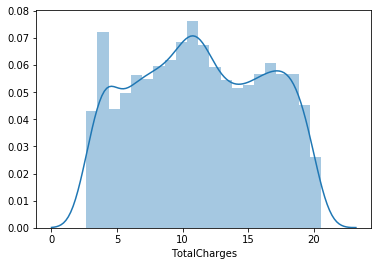

In [8]:
sns.distplot(np.cbrt(df["TotalCharges"]))

In [11]:
np.cbrt(df["TotalCharges"]).skew()

0.011168496235150815

In [ ]:
#AS WE CAN SEE,CUBE ROOT RETURNS THE MOST LESS SKEWED DATA HERE AND IS CLSER TO THE BELL CURVE THAN ANY OTHER METHOD LIKE SQRT AND LOG

In [81]:
df["TotalCharges"]=np.cbrt(df["TotalCharges"])
df["TotalCharges"].head()

0     3.102045
1    12.362766
2     4.764407
3    12.255516
4     5.332704
Name: TotalCharges, dtype: float64

In [16]:
df["TotalCharges"].skew()

0.011168496235150815

In [ ]:
#Null Value Treatment

In [14]:
df.isnull().sum()

tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
TechSupport        0
StreamingTV        0
StreamingMovies    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [ ]:
#outlier treatment


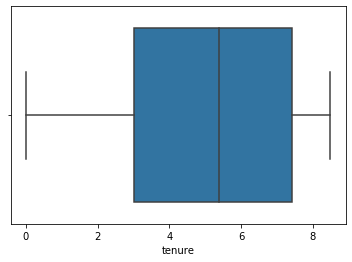

In [12]:
sns.boxplot(x="tenure",data=df)
plt.show()

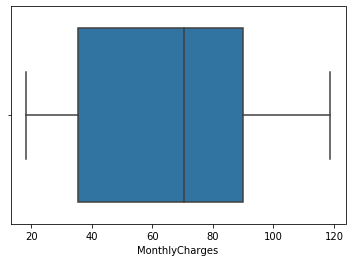

In [37]:
sns.boxplot(x="MonthlyCharges",data=df)
plt.show()

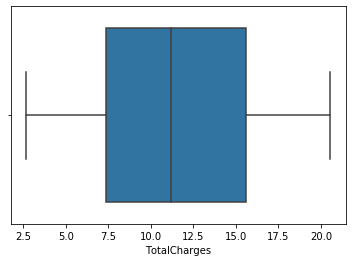

In [18]:
sns.boxplot(x="TotalCharges",data=df)
plt.show()

In [ ]:
# No outlier found 

In [61]:
#Categorical Data TREATMENT


In [82]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [83]:
df["PhoneService"]=labelencoder.fit_transform(df["PhoneService"])
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,No phone service,DSL,No,Yes,No,No,No,Month-to-month,29.85,3.102045,No
1,34,1,No,DSL,Yes,No,No,No,No,One year,56.95,12.362766,No
2,2,1,No,DSL,Yes,Yes,No,No,No,Month-to-month,53.85,4.764407,Yes
3,45,0,No phone service,DSL,Yes,No,Yes,No,No,One year,42.30,12.255516,No
4,2,1,No,Fiber optic,No,No,No,No,No,Month-to-month,70.70,5.332704,Yes


In [84]:
df["MultipleLines"]=labelencoder.fit_transform(df["MultipleLines"])

In [85]:
df["InternetService"]=labelencoder.fit_transform(df["InternetService"])

In [86]:
df["OnlineSecurity"]=labelencoder.fit_transform(df["OnlineSecurity"])

In [87]:
df["OnlineBackup"]=labelencoder.fit_transform(df["OnlineBackup"])

In [88]:
df["TechSupport"]=labelencoder.fit_transform(df["TechSupport"])

In [89]:
df["StreamingMovies"]=labelencoder.fit_transform(df["StreamingMovies"])

In [90]:
df["StreamingTV"]=labelencoder.fit_transform(df["StreamingTV"])

In [91]:
df["Contract"]=labelencoder.fit_transform(df["Contract"])

In [92]:
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,2,0,0,0,0,29.85,3.102045,No
1,34,1,0,0,2,0,0,0,0,1,56.95,12.362766,No
2,2,1,0,0,2,2,0,0,0,0,53.85,4.764407,Yes
3,45,0,1,0,2,0,2,0,0,1,42.30,12.255516,No
4,2,1,0,1,0,0,0,0,0,0,70.70,5.332704,Yes


In [93]:
Churn_d=pd.get_dummies(df['Churn'],drop_first=True)
Churn_d.head(5)

,Yes
0,0
1,0
2,1
3,0
4,1


In [116]:
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,2,0,0,0,0,29.85,3.102045,No
1,34,1,0,0,2,0,0,0,0,1,56.95,12.362766,No
2,2,1,0,0,2,2,0,0,0,0,53.85,4.764407,Yes
3,45,0,1,0,2,0,2,0,0,1,42.30,12.255516,No
4,2,1,0,1,0,0,0,0,0,0,70.70,5.332704,Yes


In [32]:
#FEATURE SCALING

In [94]:
from sklearn.model_selection import train_test_split
x=df.drop("Churn",axis=1)
y=Churn_d
#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(x_train)
X_test=sc_X.fit_transform(x_test)
print(X_train)

[[-0.49748235  0.3261494   1.11402734 ...  0.38426552  0.12975533
  -0.02193621]
 [ 1.49818033  0.3261494   1.11402734 ... -0.82237716  1.29989652
   1.66931388]
 [-0.82330483  0.3261494  -0.99347642 ... -0.82237716  0.51980239
  -0.30700724]
 ...
 [-0.17165987  0.3261494   1.11402734 ... -0.82237716  1.35798864
   0.62204222]
 [-1.23058292  0.3261494   1.11402734 ... -0.82237716 -0.34494024
  -1.32217402]
 [-0.66039359  0.3261494  -0.99347642 ...  1.5909082   0.11481736
  -0.19738163]]


In [96]:
#TRAINING OF DATA

In [97]:
#logistics regression

In [99]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#EVALUATION OF THE MODEL

In [100]:
predictions=logmodel.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[1423,  162],
       [ 225,  303]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)

81.6848083293895


In [104]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88      1585\n           1       0.65      0.57      0.61       528\n\n    accuracy                           0.82      2113\n   macro avg       0.76      0.74      0.75      2113\nweighted avg       0.81      0.82      0.81      2113\n'

In [ ]:
#KNN


In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [106]:
#classofier
classifier=KNeighborsClassifier(n_neighbors=19,p=2,metric="euclidean")
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [107]:
y_pred=classifier.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,y_pred)
res

array([[1413,  172],
       [ 262,  266]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7946048272598202

In [110]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.87      1585\n           1       0.61      0.50      0.55       528\n\n    accuracy                           0.79      2113\n   macro avg       0.73      0.70      0.71      2113\nweighted avg       0.78      0.79      0.79      2113\n'

In [48]:
#decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
classifier_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3)
#create the model
classifier_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [112]:
#pediction
y_pred=classifier_entropy.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [113]:

print("accuracy is :",accuracy_score(y_test,y_pred)*100) 

accuracy is : 79.31850449597728


In [114]:
print(confusion_matrix(y_test,y_pred))

[[1488   97]
 [ 340  188]]


In [115]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.94      0.87      1585\n           1       0.66      0.36      0.46       528\n\n    accuracy                           0.79      2113\n   macro avg       0.74      0.65      0.67      2113\nweighted avg       0.78      0.79      0.77      2113\n'